In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags  # Импортируем diags напрямую
from scipy.sparse.linalg import cg
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import bicg

# Постановка задачи

$$
\begin{equation}
\dfrac{\partial^2{u}}{\partial{t}^2} = \dfrac{\partial^2{u}}{\partial{x^2}} + \dfrac{\partial^2{u}}{\partial{y^2}} + f \\
u(x,y,t) = g(x,y,t) \ \ \ \ \forall(x,y)\in\partial{G}, \ \ \ \forall  t \in [0;T] \\
u(x,y,0) = v_1(x,y), \ \ \ \ \ \ \dfrac{\partial{u}}{\partial{t}} \Big|_{t=0} = v_2(x,y)
\end{equation}
$$

# Построение явной схемы
 
 Сначала построим разностную аппроксимацию для дифференциального уравнения:
 
 $$\dfrac{u^{n+1}_{i,j} - 2u^{n}_{i,j} + u^{n-1}_{i,j}}{h^2_t} = \dfrac{u^{n}_{i+1,j} - 2u^{n}_{i,j} + u^{n}_{i-1,j}}{h^2_x} + \dfrac{u^{n}_{i,j+1} - 2u^{n}_{i,j} + u^{n}_{i,j-1}}{h^2_y} + f_{i,j}^n$$
 
 Преобразуем для получения значения текущего слоя:
 
 $$
 u^{n+1}_{i,j} = {h^2_t}\Bigg(\dfrac{u^{n}_{i+1,j} - 2u^{n}_{i,j} + u^{n}_{i-1,j}}{h^2_x} + \dfrac{u^{n}_{i,j+1} - 2u^{n}_{i,j} + u^{n}_{i,j-1}}{h^2_y} + f_{i,j}^n\Bigg) + 2u^{n}_{i,j} - u^{n-1}_{i,j}
 $$
 
 Согласно НУ имеем:
 $$u^0_{i,j} = v_{1_{i,j}}$$
 
 Вырражение для первого слоя получим из формулы Тейлора:
 $$u^1 = u^0 + h_t v_{2_{i,j}} + \dfrac{h_t^2}{2}\Big( \dfrac{u^{0}_{i+1,j} - 2u^{0}_{i,j} + u^{0}_{i-1,j}}{h^2_x} + \dfrac{u^{0}_{i,j+1} - 2u^{0}_{i,j} + u^{0}_{i,j-1}}{h^2_y} + f_{i,j}^0\Big)$$
 
 Соберем все условия:
 
 $$
 \begin{align}
& u^{n+1}_{i,j} = {h^2_t}\Bigg(\dfrac{u^{n}_{i+1,j} - 2u^{n}_{i,j} + u^{n}_{i-1,j}}{h^2_x} + \dfrac{u^{n}_{i,j+1} - 2u^{n}_{i,j} + u^{n}_{i,j-1}}{h^2_y} + f_{i,j}^n\Bigg) + 2u^{n}_{i,j} - u^{n-1}_{i,j} \\
& u^n_{0,j} = g^n_{0,j}, \ \ u^n_{M,j} = g^n_{M,j}, \ \ u^n_{i,o} = g^n_{i,0}, \ \ u^n_{i,N} = g^n_{i,N} \ \ \\
& u^0_{i,j} = v_{1_{i,j}} \\
& u^1_{i,j} = u^0_{i,j} + h_t v_{2_{i,j}} + \dfrac{h_t^2}{2}\Big( \dfrac{u^{0}_{i+1,j} - 2u^{0}_{i,j} + u^{0}_{i-1,j}}{h^2_x} + \dfrac{u^{0}_{i,j+1} - 2u^{0}_{i,j} + u^{0}_{i,j-1}}{h^2_y} + f_{i,j}^0\Big)
 \end{align}
 $$

## 1 условие

In [3]:
v1 = lambda x,y: np.zeros(x.shape)
v2 = lambda x,y: np.zeros(x.shape)
g1 = lambda x,y,t: np.zeros(t.shape)
g2 = lambda x,y,t: np.zeros(t.shape)
g3 = lambda x,y,t: np.zeros(t.shape)
g4 = lambda x,y,t: np.zeros(t.shape)
f_rp = lambda x,y,t: np.exp(-10*((x-0.5)**2 + (y-0.5)**2)-t)

## 2 условие

In [4]:
v1 = lambda x,y: (x**10)*(1-x)*y*(1-y)
v2 = lambda x,y: np.zeros(x.shape)
g1 = lambda x,y,t: np.zeros(t.shape)
g2 = lambda x,y,t: np.zeros(t.shape)
g3 = lambda x,y,t: np.zeros(t.shape)
g4 = lambda x,y,t: np.zeros(t.shape)
f_rp = lambda x,y,t: np.zeros(t.shape)

## 3 условие

In [5]:
v1 = lambda x,y: np.zeros(x.shape)
v2 = lambda x,y: (x**10)*(1-x)*y*(1-y)
g1 = lambda x,y,t: np.zeros(t.shape)
g2 = lambda x,y,t: np.zeros(t.shape)
g3 = lambda x,y,t: np.zeros(t.shape)
g4 = lambda x,y,t: np.zeros(t.shape)
f_rp = lambda x,y,t: np.zeros(t.shape)

## 4 условие

In [6]:
v1 = lambda x,y: (1-x)*y*(1-y)*np.cos(5*x*np.pi)
v2 = lambda x,y: np.zeros(x.shape)
g1 = lambda x,y,t: y*(1-y)
g2 = lambda x,y,t: np.zeros(t.shape)
g3 = lambda x,y,t: np.zeros(t.shape)
g4 = lambda x,y,t: np.zeros(t.shape)
f_rp = lambda x,y,t: np.zeros(t.shape)

## 5 условие

In [7]:
v1 = lambda x,y: np.zeros(x.shape)
v2 = lambda x,y: np.zeros(x.shape)
g1 = lambda x,y,t: 5*np.sin(t)/(t+1)
g2 = lambda x,y,t: 5*np.sin(t)/(t+1)
g3 = lambda x,y,t: 5*np.sin(t)/(t+1)
g4 = lambda x,y,t: 5*np.sin(t)/(t+1)
f_rp = lambda x,y,t: np.zeros(t.shape)

## Функции

Tcnm 

In [8]:
def get_tenzor_mesh(n_vec, border_vec):
    x_dim = np.linspace(border_vec[0],border_vec[1],n_vec[0],endpoint=True)
#     print('x_dim: ', x_dim)
    y_dim = np.linspace(border_vec[2],border_vec[3],n_vec[1],endpoint=True)
#     print('y_dim: ', y_dim)
    t_dim = np.linspace(border_vec[4],border_vec[5],n_vec[2],endpoint=True)
#     print('t_dim: ', t_dim)
    return np.meshgrid(x_dim,y_dim,t_dim)

def get_tenzor(n_vec):
    return np.zeros(n_vec)

right_part = lambda x,y,t,tenz,n,h_x,h_y,h_t:(tenz[n,2:,1:-1] - 2*tenz[n,1:-1,1:-1] + tenz[n,:-2,1:-1])/(h_x**2)+(tenz[n,1:-1,2:] - 2*tenz[n,1:-1,1:-1] + tenz[n,1:-1,:-2])/(h_y**2) + f_rp(x,y,t)
next_layer = lambda x,y,t,tenz,n,h_x,h_y,h_t: right_part(x,y,t,tenz,n,h_x,h_y,h_t)*(h_t**2) + 2*tenz[n,1:-1,1:-1] - tenz[n-1,1:-1,1:-1]

## Реализация решения

In [9]:
x_s,y_s,t_s = 100,100,300
x_bord,y_bord,t_bord = [0,1],[0,1],[0.01,1.5]
hx,hy,ht=(x_bord[1] - x_bord[0])/x_s, (y_bord[1] - y_bord[0])/y_s, (t_bord[1] - t_bord[0])/t_s
x_,y_,t_=get_tenzor_mesh([x_s+1,y_s+1,t_s+1],[x_bord[0],x_bord[1],y_bord[0],y_bord[1],t_bord[0],t_bord[1]])

sol_tenzor = get_tenzor([t_s+1,x_s+1,y_s+1])

sol_tenzor[0] = v1(x_[:,:,0],y_[:,:,0])
sol_tenzor[:,0,:] = g1(x_[0,:,0],y_[0,:,0],t_[0,:,0])
sol_tenzor[:,-1,:] = g2(x_[-1,:,0],y_[-1,:,0],t_[-1,:,0])
sol_tenzor[:,:,0] = g3(x_[:,0,0],y_[:,0,0],t_[:,0,0])
sol_tenzor[:,:,-1] = g4(x_[:,-1,0],y_[:,-1,0],t_[:,-1,0])

sol_tenzor[1,1:-1,1:-1] = sol_tenzor[0,1:-1,1:-1] + ht*v2(x_[1:-1,1:-1,0],y_[1:-1,1:-1,0]) + ((ht**2)/2)*right_part(x_[1:-1,1:-1,0],y_[1:-1,1:-1,0],t_[1:-1,1:-1,0],sol_tenzor,0,hx,hy,ht)

for i in range(2,t_s):
    sol_tenzor[i,1:-1,1:-1] = next_layer(x_[1:-1,1:-1,i-1],y_[1:-1,1:-1,i-1],t_[1:-1,1:-1,i-1],sol_tenzor,i-1,hx,hy,ht)

# Графическая интерпретация результатов

## По примеру

<IPython.core.display.Javascript object>


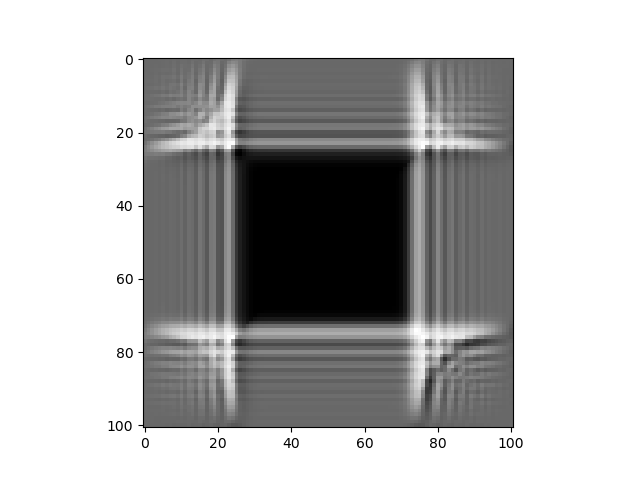

In [10]:
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.colors import LightSource
ls = LightSource(azdeg=315, altdeg=45)
from matplotlib.animation import FuncAnimation
import matplotlib.colors as mpcol
cmap = plt.cm.gray
ve=0.001

%matplotlib notebook


Z = ls.shade(sol_tenzor[1],cmap=cmap, vert_exag=ve, blend_mode='hsv')
fig, ax = plt.subplots()
im = ax.imshow(Z)

def update(frame):
    Z = ls.shade(sol_tenzor[frame], cmap=cmap, vert_exag=ve, blend_mode='hsv')
    im.set_array(Z)  # обновляем значения Z
    return [im]


ani = FuncAnimation(fig, update, frames=t_s, interval=10, blit=False)
# ani.save("animation1_5.gif", writer=PillowWriter(fps=10))

## Построение поверхности

<IPython.core.display.Javascript object>


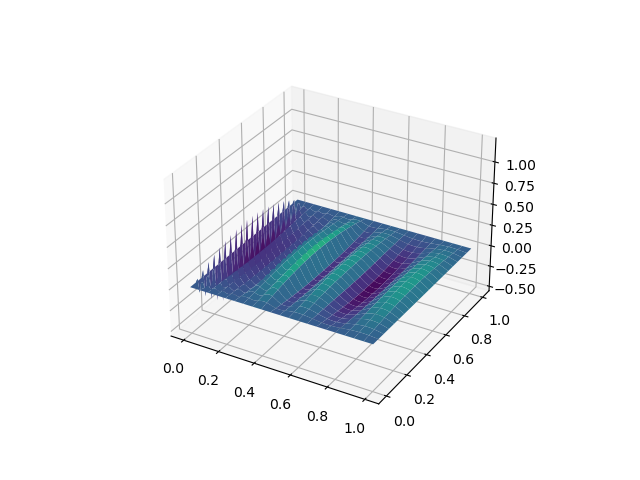

In [11]:
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.colors import LightSource
ls = LightSource(azdeg=315, altdeg=45)
from matplotlib.animation import FuncAnimation
import matplotlib.colors as mpcol
cmap = plt.cm.gray
ve=0.001

%matplotlib notebook
scaler = 5.0

Z = sol_tenzor[0]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlim(sol_tenzor.min()*scaler, sol_tenzor.max()*scaler)
z_min = sol_tenzor.min()
z_max = sol_tenzor.max()

def update(frame):
    Z = sol_tenzor[frame]
    ax.collections.clear()
    ax.plot_surface(x_[:,:,0], y_[:,:,0], Z, rstride=5, cstride=5, antialiased=True,cmap="viridis", vmin=z_min, vmax=z_max)
    return ax,



ani = FuncAnimation(fig, update, frames=t_s, interval=50, blit=True)

# ani.save("animation2_5.gif", writer=PillowWriter(fps=10))

# Неявная схема

Сначала построим разностную аппроксимацию для дифференциального уравнения:

$$\dfrac{u^{n+1}_{i,j}-2u^n_{i,j}+u^{n-1}_{i,j}}{h_t^2} = \dfrac{u^{n+1}_{i+1,j} - 2u^{n+1}_{i,j} + u^{n+1}_{i-1,j}}{2h_x^2} + \dfrac{u^{n-1}_{i+1,j} - 2u^{n-1}_{i,j} + u^{n-1}_{i-1,j}}{2h_x^2} + \dfrac{u^{n+1}_{i,j+1} - 2u^{n+1}_{i,j} + u^{n+1}_{i,j-1}} {2h_y^2}+ \dfrac{u^{n-1}_{i,j+1} - 2u^{n-1}_{i,j} + u^{n-1}_{i,j-1}}{2h_y^2} + f_{i,j}^n$$

Получим общий вид уравнений для системы текущего слоя:

$$u_{i,j}^{n+1}\Big[1 + \dfrac{h_t^2}{h_x^2} + \dfrac{h_t^2}{h_y^2}\Big] - u_{i+1,j}^{n+1}\Big[\dfrac{h_t^2}{2h_x^2}\Big] - u_{i-1,j}^{n+1}\Big[\dfrac{h_t^2}{2h_x^2}\Big] - u_{i,j+1}^{n+1}\Big[\dfrac{h_t^2}{2h_y^2}\Big] - u_{i,j-1}^{n+1}\Big[\dfrac{h_t^2}{2h_y^2}\Big] = \dfrac{h_t^2}{2h_x^2}(u^{n-1}_{i+1,j} - 2u^{n-1}_{i,j} + u^{n-1}_{i-1,j}) + \dfrac{h_t^2}{2h_y^2}(u^{n-1}_{i,j+1} - 2u^{n-1}_{i,j} + u^{n-1}_{i,j-1}) + 2u^{n}_{i,j} - u^{n-1}_{i,j} + f_{i,j}^n$$

НУ совпадают с явной схемой, в итоге получим:

$$
\begin{align}
& u_{i,j}^{n+1}\Big[1 + \dfrac{h_t^2}{h_x^2} + \dfrac{h_t^2}{h_y^2}\Big] - u_{i+1,j}^{n+1}\Big[\dfrac{h_t^2}{2h_x^2}\Big] - u_{i-1,j}^{n+1}\Big[\dfrac{h_t^2}{2h_x^2}\Big] - u_{i,j+1}^{n+1}\Big[\dfrac{h_t^2}{2h_y^2}\Big] - u_{i,j-1}^{n+1}\Big[\dfrac{h_t^2}{2h_y^2}\Big] = \dfrac{h_t^2}{2h_x^2}(u^{n-1}_{i+1,j} - 2u^{n-1}_{i,j} + u^{n-1}_{i-1,j}) + \dfrac{h_t^2}{2h_y^2}(u^{n-1}_{i,j+1} - 2u^{n-1}_{i,j} + u^{n-1}_{i,j-1}) + 2u^{n}_{i,j} - u^{n-1}_{i,j} + f_{i,j}^n \\
& u^n_{0,j} = g^n_{0,j}, \ \ u^n_{M,j} = g^n_{M,j}, \ \ u^n_{i,o} = g^n_{i,0}, \ \ u^n_{i,N} = g^n_{i,N} \ \ \\
& u^0_{i,j} = v_{1_{i,j}} \\
& u^1_{i,j} = u^0_{i,j} + h_t v_{2_{i,j}} + \dfrac{h_t^2}{2}\Big( \dfrac{u^{0}_{i+1,j} - 2u^{0}_{i,j} + u^{0}_{i-1,j}}{h^2_x} + \dfrac{u^{0}_{i,j+1} - 2u^{0}_{i,j} + u^{0}_{i,j-1}}{h^2_y} + f_{i,j}^0\Big)
\end{align}
$$

## 1 условие

In [80]:
v1 = lambda x,y: np.zeros(x.shape)
v2 = lambda x,y: np.zeros(x.shape)
g1 = lambda x,y,t: np.zeros(t.shape)
g2 = lambda x,y,t: np.zeros(t.shape)
g3 = lambda x,y,t: np.zeros(t.shape)
g4 = lambda x,y,t: np.zeros(t.shape)
f_rp = lambda x,y,t: np.exp(-10*((x-0.5)**2 + (y-0.5)**2)-t)

## 2 условие

In [36]:
v1 = lambda x,y: (x**10)*(1-x)*y*(1-y)
v2 = lambda x,y: np.zeros(x.shape)
g1 = lambda x,y,t: np.zeros(t.shape)
g2 = lambda x,y,t: np.zeros(t.shape)
g3 = lambda x,y,t: np.zeros(t.shape)
g4 = lambda x,y,t: np.zeros(t.shape)
f_rp = lambda x,y,t: np.zeros(t.shape)

## 3 условие

In [14]:
v1 = lambda x,y: np.zeros(x.shape)
v2 = lambda x,y: (x**10)*(1-x)*y*(1-y)
g1 = lambda x,y,t: np.zeros(t.shape)
g2 = lambda x,y,t: np.zeros(t.shape)
g3 = lambda x,y,t: np.zeros(t.shape)
g4 = lambda x,y,t: np.zeros(t.shape)
f_rp = lambda x,y,t: np.zeros(t.shape)

## 4 условие

In [130]:
v1 = lambda x,y: (1-x)*y*(1-y)*np.cos(5*x*np.pi)
v2 = lambda x,y: np.zeros(x.shape)
g1 = lambda x,y,t: y*(1-y)
g2 = lambda x,y,t: np.zeros(t.shape)
g3 = lambda x,y,t: np.zeros(t.shape)
g4 = lambda x,y,t: np.zeros(t.shape)
f_rp = lambda x,y,t: np.zeros(t.shape)

## 5 условие

In [123]:
v1 = lambda x,y: np.zeros(x.shape)
v2 = lambda x,y: np.zeros(x.shape)
g1 = lambda x,y,t: 5*np.sin(t)/(t+1)
g2 = lambda x,y,t: 5*np.sin(t)/(t+1)
g3 = lambda x,y,t: 5*np.sin(t)/(t+1)
g4 = lambda x,y,t: 5*np.sin(t)/(t+1)
f_rp = lambda x,y,t: np.zeros(t.shape)

In [144]:
v1 = lambda x,y: (1-x)**2*y*(1-y)*np.cos(5*x*np.pi)
v2 = lambda x,y: (x**10)*(1-x)*y*(1-y)
g1 = lambda x,y,t: 5*np.cos(t)/(t+1)
g2 = lambda x,y,t: 5*np.cos(t)/(t+1)
g3 = lambda x,y,t: 5*np.cos(t)/(t+1)
g4 = lambda x,y,t: 5*np.cos(t)/(t+1)
f_rp = lambda x,y,t: np.zeros(t.shape)

In [163]:
v1 = lambda x,y: (1-x)**2*y*(1-y)*np.cos(5*x*np.pi)
v2 = lambda x,y: (x**10)*(1-x)*y*(1-y)
g1 = lambda x,y,t: 5*np.cos(t)/(t+1)
g2 = lambda x,y,t: 5*np.sin(t)/(t+1)
g3 = lambda x,y,t: 5*np.cos(t)/(t+1)
g4 = lambda x,y,t: 5*np.sin(t)/(t+1)
f_rp = lambda x,y,t: np.sin(t)*np.sin(x)*np.sin(y)

# Составление системы для слоя

In [164]:
# лчень тупая версия генерации матриц и правой части
right_part_v1 = lambda x,y,t,tenz,n,ht,hx,hy:(ht**2)/(2*hx**2)*(tenz[n-2,2:,1:-1] - 2*tenz[n-2,1:-1,1:-1] + tenz[n-2,:-2,1:-1]) +(ht**2)/(2*hy**2)*(tenz[n-2,1:-1,2:] - 2*tenz[n-2,1:-1,1:-1] + tenz[n-2,1:-1,:-2]) + 2*tenz[n-1,1:-1,1:-1] - tenz[n-2,1:-1,1:-1] + f_rp(x,y,t)
def generate_linear_system(x,y,t,tenz,n,ht,hx,hy):
    m = tenz.shape[1] - 2
    k = tenz.shape[2] - 2
    
    N=m*k
    diagonals = [
        (1 + ht**2/hx**2 + ht**2/hy**2) * np.ones(N),      # главная диагональ (4)
        (-1)*ht**2/(2*hx**2) * np.ones(N - 1), # нижняя диагональ (-1)
        (-1)*ht**2/(2*hx**2) * np.ones(N - 1), # верхняя диагональ (-1)
        (-1)*ht**2/(2*hy**2) * np.ones(N - m), # нижняя диагональ (-m)
        (-1)*ht**2/(2*hy**2)* np.ones(N - m), # верхняя диагональ (+m)
    ]
    
    diagonals[1][m-1::m] = 0
    diagonals[2][m-1::m] = 0
#     diagonals[3][:m+1] = 0
#     diagonals[4][-m] = 0

    # Создание разреженной матрицы A
    A_ = diags(diagonals, offsets=[0, -1, 1,-m,m], shape=(N, N)).toarray()
    
    
    
    
    b = right_part_v1(x,y,t,tenz,n,ht,hx,hy)
#     print('b: ',(b>0).any())
    b[0,0] = b[0,0] + tenz[n,0,1] * (ht**2)/(2*hx**2) + tenz[n,1,0] * (ht**2)/(2*hy**2)
    b[0,-1] = b[0,-1] + tenz[n,0,-2] * (ht**2)/(2*hx**2) + tenz[n,1,-1] * (ht**2)/(2*hy**2)
    b[-1,0] = b[-1,0] + tenz[n,-1,1] * (ht**2)/(2*hx**2) + tenz[n,-2,0] * (ht**2)/(2*hy**2)
    b[-1,-1] = b[-1,-1] + tenz[n,-1,-2] * (ht**2)/(2*hx**2) + tenz[n,-2,-1] * (ht**2)/(2*hy**2)
    b[0,1:-1] = b[0,1:-1] + tenz[n, 0, 2:-2] *  (ht**2)/(2*hx**2)
    b[-1,1:-1] = b[-1,1:-1] + tenz[n, -1, 2:-2] *  (ht**2)/(2*hx**2)
    b[1:-1,0] = b[1:-1,0] + tenz[n, 2:-2, 0] *  (ht**2)/(2*hy**2)
    b[1:-1,-1] = b[1:-1,-1] + tenz[n, 2:-2, -1] *  (ht**2)/(2*hy**2)
       
    return A_,b.reshape(m*k)

# Код для поиска решения

In [165]:
x_s,y_s,t_s = 40,40,1000
x_bord,y_bord,t_bord = [0,1],[0,1],[0.01,10]
hx,hy,ht=(x_bord[1] - x_bord[0])/x_s, (y_bord[1] - y_bord[0])/y_s, (t_bord[1] - t_bord[0])/t_s
x_,y_,t_=get_tenzor_mesh([x_s+1,y_s+1,t_s+1],[x_bord[0],x_bord[1],y_bord[0],y_bord[1],t_bord[0],t_bord[1]])

sol_tenzor = get_tenzor([t_s+1,x_s+1,y_s+1])

sol_tenzor[0] = v1(x_[:,:,0],y_[:,:,0])
sol_tenzor[:,0,:] = g1(x_[0,:,0],y_[0,:,0],t_[0,:,0])
sol_tenzor[:,-1,:] = g2(x_[-1,:,0],y_[-1,:,0],t_[-1,:,0])
sol_tenzor[:,:,0] = g3(x_[:,0,0],y_[:,0,0],t_[:,0,0])
sol_tenzor[:,:,-1] = g4(x_[:,-1,0],y_[:,-1,0],t_[:,-1,0])

sol_tenzor[1,1:-1,1:-1] = sol_tenzor[0,1:-1,1:-1] + ht*v2(x_[1:-1,1:-1,0],y_[1:-1,1:-1,0]) + ((ht**2)/2)*right_part(x_[1:-1,1:-1,0],y_[1:-1,1:-1,0],t_[1:-1,1:-1,0],sol_tenzor,0,hx,hy,ht)
b_s = []
x_r = []
for i in range(2,t_s):
    A,b = generate_linear_system(x_[1:-1,1:-1,i-1],y_[1:-1,1:-1,i-1],t_[1:-1,1:-1,i-1],sol_tenzor,i,ht,hx,hy)
#     b_s.append(b)
#     x, info = cg(A, b,tol=1e-12)

    A = csc_matrix(A)

    # Используем метод бисопряженных градиентов
    x, info = bicg(A, b,tol=1e-12)

    if info != 0:
        print("Метод не сошелся. Код завершения:", info)
    x_r.append(x)
    sol_tenzor[i,1:-1,1:-1] = np.copy(x.reshape((x_s-1,y_s-1)))
    if(i%10==0):
        print('Ура! Уже ', i, ' итераций!')
#         print(np.linalg.norm(sol_tenzor[i,1:-1,1:-1] - sol_tenzor[i-10,1:-1,1:-1]))

Ура! Уже  10  итераций!
Ура! Уже  20  итераций!
Ура! Уже  30  итераций!
Ура! Уже  40  итераций!
Ура! Уже  50  итераций!
Ура! Уже  60  итераций!
Ура! Уже  70  итераций!
Ура! Уже  80  итераций!
Ура! Уже  90  итераций!
Ура! Уже  100  итераций!
Ура! Уже  110  итераций!
Ура! Уже  120  итераций!
Ура! Уже  130  итераций!
Ура! Уже  140  итераций!
Ура! Уже  150  итераций!
Ура! Уже  160  итераций!
Ура! Уже  170  итераций!
Ура! Уже  180  итераций!
Ура! Уже  190  итераций!
Ура! Уже  200  итераций!
Ура! Уже  210  итераций!
Ура! Уже  220  итераций!
Ура! Уже  230  итераций!
Ура! Уже  240  итераций!
Ура! Уже  250  итераций!
Ура! Уже  260  итераций!
Ура! Уже  270  итераций!
Ура! Уже  280  итераций!
Ура! Уже  290  итераций!
Ура! Уже  300  итераций!
Ура! Уже  310  итераций!
Ура! Уже  320  итераций!
Ура! Уже  330  итераций!
Ура! Уже  340  итераций!
Ура! Уже  350  итераций!
Ура! Уже  360  итераций!
Ура! Уже  370  итераций!
Ура! Уже  380  итераций!
Ура! Уже  390  итераций!
Ура! Уже  400  итераций!
Ура! Уже 

In [12]:
# for i in range(100):
#     print('X: ',(x_r[i] == x_r[i+1]).all())
# #     print('B: ',(b_s[i] == b_s[i+1]).all())

# Графическая интерпретация результатов

## По примеру

<IPython.core.display.Javascript object>


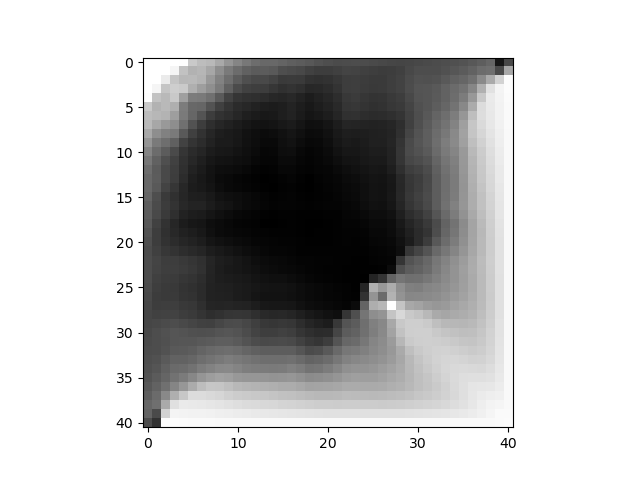

In [166]:
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.colors import LightSource
ls = LightSource(azdeg=315, altdeg=45)
from matplotlib.animation import FuncAnimation
import matplotlib.colors as mpcol
cmap = plt.cm.gray
ve=1

%matplotlib notebook


Z = ls.shade(sol_tenzor[0],cmap=cmap, vert_exag=ve, blend_mode='hsv')
# Z =ls.hillshade(sol_tenzor[0], vert_exag=ve)
fig, ax = plt.subplots()
im = ax.imshow(Z)


def update(frame):
    Z = ls.shade(sol_tenzor[frame], cmap=cmap, vert_exag=ve, blend_mode='hsv')
#     Z =ls.hillshade(sol_tenzor[frame], vert_exag=ve)
    im.set_array(Z)  # обновляем значения Z
    return [im]


ani = FuncAnimation(fig, update, frames=t_s, interval=10, blit=False)
# ani.save("animation3_1.gif", writer=PillowWriter(fps=10))

## Построение поверхности

<IPython.core.display.Javascript object>


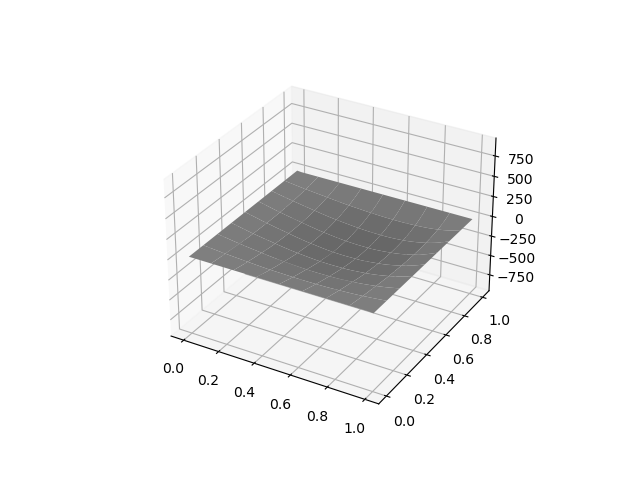

In [167]:
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.colors import LightSource
ls = LightSource(azdeg=315, altdeg=45)
from matplotlib.animation import FuncAnimation
import matplotlib.colors as mpcol
cmap = plt.cm.gray
ve=0.001

%matplotlib notebook
scaler = 4

Z = sol_tenzor[0]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlim(sol_tenzor.min()*scaler, sol_tenzor.max()*scaler)
z_min = sol_tenzor.min()
z_max = sol_tenzor.max()

def update(frame):
    Z = sol_tenzor[frame]
    ax.collections.clear()
    ax.plot_surface(x_[:,:,0], y_[:,:,0], Z, rstride=5, cstride=5, antialiased=True,cmap="gray", vmin=z_min*scaler, vmax=z_max*scaler)
    return ax,




ani = FuncAnimation(fig, update, frames=t_s, interval=10, blit=True)

# ani.save("animation4_1.gif", writer=PillowWriter(fps=10))

# Теплопроводность


$$
\begin{equation}
\dfrac{\partial{u}}{\partial{t}} = \dfrac{\partial^2{u}}{\partial{x}^2} + \dfrac{\partial^2{u}}{\partial{y}^2} \\
u(x,y,0) = \varphi(x,y) \\ 
u(x,y,t) = g(x,y,t) \ \ \ (x,y) \in \partial{G}
\end{equation}
$$

Явная схема:

$$
 u^{n+1}_{i,j} = 2t\Big(\dfrac{u^{n}_{i+1,j} - 2 u^n_{i,j} + u^{n}_{i-1,j}}{h_x^2} + \dfrac{u^{n}_{i,j+1} - 2 u^n_{i,j} + u^{n}_{i,j-1}}{h_y^2}\Big) + u^{n-1}_{i,j} \\
 u^0_{i,j} = \varphi_{i,j} \\
 u^n_{0,j}  = g^n_{0,j}, \ \ \ u^n_{i,0}  = g^n_{i,0}, \ \ \ u^n_{M,j}  = g^n_{M,j}, \ \ \ u^n_{i,N}  = g^n_{i,N}
$$

In [9]:
v1 = lambda x,y: np.exp(x**2 + y**2)
v2 = lambda x,y: np.zeros(x.shape)
g1 = lambda x,y,t: np.exp(np.cos(t))
g2 = lambda x,y,t: np.exp(np.sinh(t))
g3 = lambda x,y,t: np.exp(x+t)
g4 = lambda x,y,t: np.exp(t**2 + t**3)
f_rp = lambda x,y,t: np.zeros(t.shape)

In [29]:
v1 = lambda x,y: (x-0.5)**2 + (y-0.5)**2
v2 = lambda x,y: np.zeros(x.shape)
g1 = lambda x,y,t: (x-0.5)**2 + (y-0.5)**2
g2 = lambda x,y,t: (x-0.5)**2 + (y-0.5)**2
g3 = lambda x,y,t: (x-0.5)**2 + (y-0.5)**2
g4 = lambda x,y,t: (x-0.5)**2 + (y-0.5)**2
f_rp = lambda x,y,t: np.zeros(t.shape)

In [53]:
v1 = lambda x,y: (x-0.5)**2 + (y-0.5)**2
v2 = lambda x,y: np.zeros(x.shape)
g1 = lambda x,y,t: np.zeros(x.shape)
g2 = lambda x,y,t: np.zeros(x.shape)
g3 = lambda x,y,t: np.zeros(x.shape)
g4 = lambda x,y,t: np.zeros(x.shape)
f_rp = lambda x,y,t: np.zeros(t.shape)

In [54]:
def get_tenzor_mesh(n_vec, border_vec):
    x_dim = np.linspace(border_vec[0],border_vec[1],n_vec[0],endpoint=True)
#     print('x_dim: ', x_dim)
    y_dim = np.linspace(border_vec[2],border_vec[3],n_vec[1],endpoint=True)
#     print('y_dim: ', y_dim)
    t_dim = np.linspace(border_vec[4],border_vec[5],n_vec[2],endpoint=True)
#     print('t_dim: ', t_dim)
    return np.meshgrid(x_dim,y_dim,t_dim)

def get_tenzor(n_vec):
    return np.zeros(n_vec)

right_part = lambda x,y,t,tenz,n,h_x,h_y,h_t:(tenz[n,2:,1:-1] - 2*tenz[n,1:-1,1:-1] + tenz[n,:-2,1:-1])/(h_x**2)+(tenz[n,1:-1,2:] - 2*tenz[n,1:-1,1:-1] + tenz[n,1:-1,:-2])/(h_y**2)
next_layer = lambda x,y,t,tenz,n,h_x,h_y,h_t: right_part(x,y,t,tenz,n,h_x,h_y,h_t)*(h_t*2) + tenz[n-1,1:-1,1:-1]

In [83]:
x_s,y_s,t_s = 101,101,1001
x_bord,y_bord,t_bord = [0,1],[0,1],[0,0.01]
hx,hy,ht=(x_bord[1] - x_bord[0])/x_s, (y_bord[1] - y_bord[0])/y_s, (t_bord[1] - t_bord[0])/t_s
x_,y_,t_=get_tenzor_mesh([x_s+1,y_s+1,t_s+1],[x_bord[0],x_bord[1],y_bord[0],y_bord[1],t_bord[0],t_bord[1]])

sol_tenzor = get_tenzor([t_s+1,x_s+1,y_s+1])

sol_tenzor[0] = v1(x_[:,:,0],y_[:,:,0])
sol_tenzor[:,0,:] = g1(x_[0,:,0],y_[0,:,0],t_[0,:,0])
sol_tenzor[:,-1,:] = g2(x_[-1,:,0],y_[-1,:,0],t_[-1,:,0])
sol_tenzor[:,:,0] = g3(x_[:,0,0],y_[:,0,0],t_[:,0,0])
sol_tenzor[:,:,-1] = g4(x_[:,-1,0],y_[:,-1,0],t_[:,-1,0])

sol_tenzor[1,1:-1,1:-1] =2*ht*((sol_tenzor[0,2:,1:-1] - 2*sol_tenzor[0,1:-1,1:-1] + sol_tenzor[0,:-2,1:-1])/(hx**2) + (sol_tenzor[0,1:-1,2:] - 2*sol_tenzor[0,1:-1,1:-1] + sol_tenzor[0,1:-1,:-2])/(hy**2)) +  sol_tenzor[0,1:-1,1:-1]

for i in range(2,t_s):
    sol_tenzor[i,1:-1,1:-1] = next_layer(x_[1:-1,1:-1,i-1],y_[1:-1,1:-1,i-1],t_[1:-1,1:-1,i-1],sol_tenzor,i-1,hx,hy,ht)

C:\Users\mihch\AppData\Local\Temp/ipykernel_25172/3928628268.py:13: RuntimeWarning: overflow encountered in add
  right_part = lambda x,y,t,tenz,n,h_x,h_y,h_t:(tenz[n,2:,1:-1] - 2*tenz[n,1:-1,1:-1] + tenz[n,:-2,1:-1])/(h_x**2)+(tenz[n,1:-1,2:] - 2*tenz[n,1:-1,1:-1] + tenz[n,1:-1,:-2])/(h_y**2)
C:\Users\mihch\AppData\Local\Temp/ipykernel_25172/3928628268.py:13: RuntimeWarning: overflow encountered in true_divide
  right_part = lambda x,y,t,tenz,n,h_x,h_y,h_t:(tenz[n,2:,1:-1] - 2*tenz[n,1:-1,1:-1] + tenz[n,:-2,1:-1])/(h_x**2)+(tenz[n,1:-1,2:] - 2*tenz[n,1:-1,1:-1] + tenz[n,1:-1,:-2])/(h_y**2)
C:\Users\mihch\AppData\Local\Temp/ipykernel_25172/3928628268.py:13: RuntimeWarning: invalid value encountered in subtract
  right_part = lambda x,y,t,tenz,n,h_x,h_y,h_t:(tenz[n,2:,1:-1] - 2*tenz[n,1:-1,1:-1] + tenz[n,:-2,1:-1])/(h_x**2)+(tenz[n,1:-1,2:] - 2*tenz[n,1:-1,1:-1] + tenz[n,1:-1,:-2])/(h_y**2)
C:\Users\mihch\AppData\Local\Temp/ipykernel_25172/3928628268.py:13: RuntimeWarning: invalid value

<IPython.core.display.Javascript object>


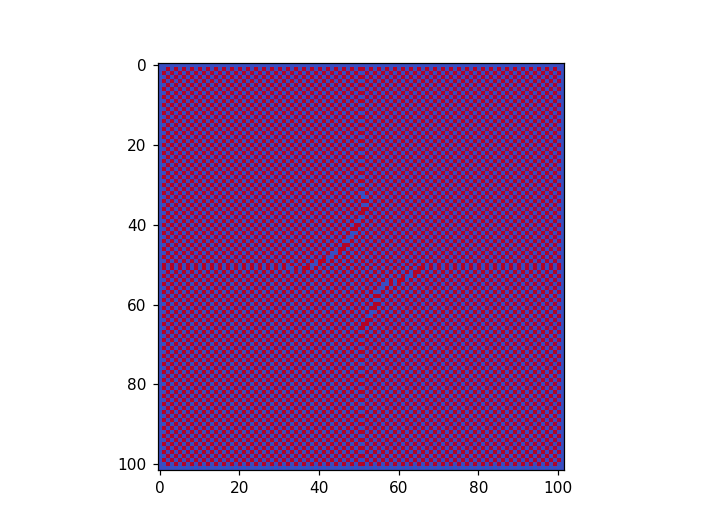

In [84]:
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.colors import LightSource
ls = LightSource(azdeg=315, altdeg=45)
from matplotlib.animation import FuncAnimation
import matplotlib.colors as mpcol
cmap = plt.cm.rainbow
ve=1
    
%matplotlib notebook


# Z =ls.hillshade(sol_tenzor[0], vert_exag=ve)
fig, ax = plt.subplots()
vm = sol_tenzor.max()
im = ax.imshow(sol_tenzor[0],cmap='coolwarm')


def update(frame):
    Z = sol_tenzor[frame]
#     Z =ls.hillshade(sol_tenzor[frame], vert_exag=ve)
    im.set_array(Z)  # обновляем значения Z
    return [im]


ani = FuncAnimation(fig, update, frames=t_s, interval=10, blit=True)
# ani.save("animation3_1.gif", writer=PillowWriter(fps=10))

<IPython.core.display.Javascript object>


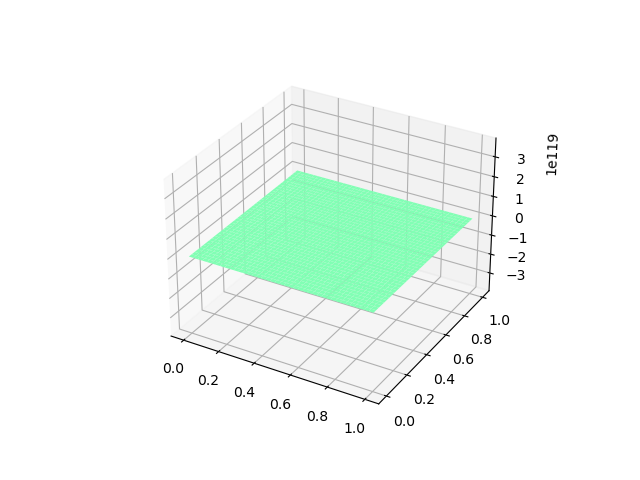

In [215]:
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.colors import LightSource
ls = LightSource(azdeg=315, altdeg=45)
from matplotlib.animation import FuncAnimation
import matplotlib.colors as mpcol
cmap = plt.cm.gray
ve=0.001

%matplotlib notebook
scaler = 5.0

Z = sol_tenzor[0]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlim(sol_tenzor.min()*scaler, sol_tenzor.max()*scaler)
z_min = sol_tenzor.min()
z_max = sol_tenzor.max()

def update(frame):
    Z = sol_tenzor[frame]
    ax.collections.clear()
    ax.plot_surface(x_[:,:,0], y_[:,:,0], Z, rstride=5, cstride=5, antialiased=True,cmap="rainbow",vmin = z_min,vmax = z_max)
    return ax,




ani = FuncAnimation(fig, update, frames=t_s, interval=50, blit=True)